In [14]:
"""
Making neccesary imports 
"""

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import scipy
from scipy.io import arff

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

In [28]:
"""
Reading the .arff files for phone accel sensor and storing them in a dataframe.
"""

phone_accel_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/phone/accel')
filenames.pop(6)

for file in filenames:
    path = "wisdm-dataset/arff_files/phone/accel/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, phone_accel_df]
    phone_accel_df = pd.concat(frames, sort = False)

"""
Setting data options
"""
print("Shape of data: ", phone_accel_df.shape)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
phone_accel_df.describe()

for file at wisdm-dataset/arff_files/phone/accel/data_1611_accel_phone.arffshape is: (404, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1630_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1641_accel_phone.arffshape is: (803, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1624_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1605_accel_phone.arffshape is: (406, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1601_accel_phone.arffshape is: (407, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1645_accel_phone.arffshape is: (803, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1620_accel_phone.arffshape is: (555, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1634_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1615_accel_phone.arffshape is: (404, 93)
for file at wisdm-dataset/arff_files/phone/accel/d

,"""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""","""X9""","""Y0""","""Y1""","""Y2""","""Y3""","""Y4""","""Y5""","""Y6""","""Y7""","""Y8""","""Y9""","""Z0""","""Z1""","""Z2""","""Z3""","""Z4""","""Z5""","""Z6""","""Z7""","""Z8""","""Z9""","""XAVG""","""YAVG""","""ZAVG""","""XPEAK""","""YPEAK""","""ZPEAK""","""XABSOLDEV""","""YABSOLDEV""","""ZABSOLDEV""","""XSTANDDEV""","""YSTANDDEV""","""ZSTANDDEV""","""XVAR""","""YVAR""","""ZVAR""","""XMFCC0""","""XMFCC1""","""XMFCC2""","""XMFCC3""","""XMFCC4""","""XMFCC5""","""XMFCC6""","""XMFCC7""","""XMFCC8""","""XMFCC9""","""XMFCC10""","""XMFCC11""","""XMFCC12""","""YMFCC0""","""YMFCC1""","""YMFCC2""","""YMFCC3""","""YMFCC4""","""YMFCC5""","""YMFCC6""","""YMFCC7""","""YMFCC8""","""YMFCC9""","""YMFCC10""","""YMFCC11""","""YMFCC12""","""ZMFCC0""","""ZMFCC1""","""ZMFCC2""","""ZMFCC3""","""ZMFCC4""","""ZMFCC5""","""ZMFCC6""","""ZMFCC7""","""ZMFCC8""","""ZMFCC9""","""ZMFCC10""","""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT"""
count,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000,23074.000000
mean,0.286300,0.174766,0.153323,0.127511,0.113369,0.122740,0.011498,0.004455,0.002360,0.003677,0.444564,0.160766,0.108104,0.081655,0.047574,0.116734,0.025588,0.006439,0.003615,0.004960,0.267592,0.241034,0.187288,0.117798,0.092283,0.087346,0.003055,0.001425,0.000857,0.001323,0.635941,-1.222940,0.237969,49.482422,48.574631,44.100662,1.032010,1.094064,0.952755,0.095627,0.099844,0.090961,0.233516,0.231194,0.231338,0.284676,0.402377,0.401731,0.400654,0.399149,0.397216,0.394857,0.392076,0.388875,0.385257,0.381227,0.376789,0.371947,0.276331,0.390582,0.389955,0.388910,0.387448,0.385572,0.383283,0.380583,0.377476,0.373964,0.370052,0.365744,0.361044,0.272830,0.385634,0.385014,0.383983,0.382540,0.380687,0.378427,0.375761,0.372693,0.369226,0.365364,0.361110,0.356470,0.077872,-0.034613,0.123174,-0.037359,0.026912,-0.007542,10.095703
std,0.408534,0.296568,0.268249,0.271586,0.276431,0.300808,0.048297,0.019449,0.010885,0.021607,0.465237,0.325068,0.274509,0.243585,0.168535,0.277425,0.078746,0.023216,0.014684,0.024945,0.379247,0.323172,0.286859,0.259943,0.255854,0.266755,0.011948,0.005944,0.004175,0.008752,5.371801,6.412525,4.433881,16.058773,15.317661,12.033639,1.660467,1.916945,1.374184,0.150227,0.166625,0.130206,0.202729,0.215395,0.193509,0.128939,0.182249,0.181957,0.181469,0.180787,0.179912,0.178843,0.177584,0.176134,0.174495,0.172670,0.170660,0.168467,0.158076,0.223433,0.223074,0.222476,0.221640,0.220567,0.219257,0.217713,0.215935,0.213926,0.211689,0.209224,0.206536,0.132388,0.187124,0.186824,0.186323,0.185623,0.184724,0.183627,0.182334,0.180845,0.179163,0.177289,0.175225,0.172973,0.839202,0.798469,0.804191,0.409485,0.431765,0.389613,1.143357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [19]:
"""
Reading the .arff files for phone gyro sensor and storing them in a dataframe.
"""

# phone_gyro_df = pd.DataFrame()
# filenames = os.listdir('wisdm-dataset/arff_files/phone/gyro')
# filenames.pop(0)
# for file in filenames:
#     path = "wisdm-dataset/arff_files/phone/gyro/" + file
#     data = arff.loadarff(path)
#     df = pd.DataFrame(data[0])
#     print("for file at " + path + "shape is: " + str(df.shape))
#     frames = [df, phone_accel_df]
#     phone_accel_df = pd.concat(frames, sort = False)

# """
# Setting data options
# """
# print("Shape of data: ", phone_accel_df.shape)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# phone_accel_df.describe()

In [20]:
"""
Reading the .arff files for watch accel sensor and storing them in a dataframe.
"""

# watch_accel_df = pd.DataFrame()
# filenames = os.listdir('wisdm-dataset/arff_files/watch/accel')
# filenames.pop(0)
# for file in filenames:
#     path = "wisdm-dataset/arff_files/watch/accel/" + file
#     data = arff.loadarff(path)
#     df = pd.DataFrame(data[0])
#     print("for file at " + path + "shape is: " + str(df.shape))
#     frames = [df, watch_accel_df]
#     watch_accel_df = pd.concat(frames, sort = False)
    
# print(watch_accel_df.shape)

# """
# Setting data options
# """
# print("Shape of data: ", phone_accel_df.shape)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# phone_accel_df.describe()

In [21]:
"""
Reading the .arff files for watch gyro sensor and storing them in a dataframe.
"""

# watch_gyro_df = pd.DataFrame()
# filenames = os.listdir('wisdm-dataset/arff_files/watch/gyro')
# filenames.pop(0)
# for file in filenames:
#     path = "wisdm-dataset/arff_files/watch/gyro/" + file
#     data = arff.loadarff(path)
#     df = pd.DataFrame(data[0])
#     print("for file at " + path + "shape is: " + str(df.shape))
#     frames = [df, watch_gyro_df]
#     watch_gyro_df = pd.concat(frames, sort = False)
    
# print(watch_gyro_df.shape)

# """
# Setting data options
# """
# print("Shape of data: ", phone_accel_df.shape)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# phone_accel_df.describe()

In [22]:
"""
Combining all data into one dataframe
"""

# database = pd.DataFrame()
# frames_to_merge = [phone_gyro_df, phone_accel_df, watch_gyro_df, watch_accel_df]
# database = pd.concat(frames_to_merge, sort = False)
# database.shape
# database.head()
# database.info()

In [30]:
old_column_names = phone_accel_df.columns
new_column_names = []
for name in old_column_names:
    new_column_names.append(name.replace('"', ''))

new_column_names

['ACTIVITY',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'Y0',
 'Y1',
 'Y2',
 'Y3',
 'Y4',
 'Y5',
 'Y6',
 'Y7',
 'Y8',
 'Y9',
 'Z0',
 'Z1',
 'Z2',
 'Z3',
 'Z4',
 'Z5',
 'Z6',
 'Z7',
 'Z8',
 'Z9',
 'XAVG',
 'YAVG',
 'ZAVG',
 'XPEAK',
 'YPEAK',
 'ZPEAK',
 'XABSOLDEV',
 'YABSOLDEV',
 'ZABSOLDEV',
 'XSTANDDEV',
 'YSTANDDEV',
 'ZSTANDDEV',
 'XVAR',
 'YVAR',
 'ZVAR',
 'XMFCC0',
 'XMFCC1',
 'XMFCC2',
 'XMFCC3',
 'XMFCC4',
 'XMFCC5',
 'XMFCC6',
 'XMFCC7',
 'XMFCC8',
 'XMFCC9',
 'XMFCC10',
 'XMFCC11',
 'XMFCC12',
 'YMFCC0',
 'YMFCC1',
 'YMFCC2',
 'YMFCC3',
 'YMFCC4',
 'YMFCC5',
 'YMFCC6',
 'YMFCC7',
 'YMFCC8',
 'YMFCC9',
 'YMFCC10',
 'YMFCC11',
 'YMFCC12',
 'ZMFCC0',
 'ZMFCC1',
 'ZMFCC2',
 'ZMFCC3',
 'ZMFCC4',
 'ZMFCC5',
 'ZMFCC6',
 'ZMFCC7',
 'ZMFCC8',
 'ZMFCC9',
 'ZMFCC10',
 'ZMFCC11',
 'ZMFCC12',
 'XYCOS',
 'XZCOS',
 'YZCOS',
 'XYCOR',
 'XZCOR',
 'YZCOR',
 'RESULTANT',
 'class']

In [31]:
replacement_dict = dict(zip(old_column_names, new_column_names))
replacement_dict

{'"ACTIVITY"': 'ACTIVITY',
 '"X0"': 'X0',
 '"X1"': 'X1',
 '"X2"': 'X2',
 '"X3"': 'X3',
 '"X4"': 'X4',
 '"X5"': 'X5',
 '"X6"': 'X6',
 '"X7"': 'X7',
 '"X8"': 'X8',
 '"X9"': 'X9',
 '"Y0"': 'Y0',
 '"Y1"': 'Y1',
 '"Y2"': 'Y2',
 '"Y3"': 'Y3',
 '"Y4"': 'Y4',
 '"Y5"': 'Y5',
 '"Y6"': 'Y6',
 '"Y7"': 'Y7',
 '"Y8"': 'Y8',
 '"Y9"': 'Y9',
 '"Z0"': 'Z0',
 '"Z1"': 'Z1',
 '"Z2"': 'Z2',
 '"Z3"': 'Z3',
 '"Z4"': 'Z4',
 '"Z5"': 'Z5',
 '"Z6"': 'Z6',
 '"Z7"': 'Z7',
 '"Z8"': 'Z8',
 '"Z9"': 'Z9',
 '"XAVG"': 'XAVG',
 '"YAVG"': 'YAVG',
 '"ZAVG"': 'ZAVG',
 '"XPEAK"': 'XPEAK',
 '"YPEAK"': 'YPEAK',
 '"ZPEAK"': 'ZPEAK',
 '"XABSOLDEV"': 'XABSOLDEV',
 '"YABSOLDEV"': 'YABSOLDEV',
 '"ZABSOLDEV"': 'ZABSOLDEV',
 '"XSTANDDEV"': 'XSTANDDEV',
 '"YSTANDDEV"': 'YSTANDDEV',
 '"ZSTANDDEV"': 'ZSTANDDEV',
 '"XVAR"': 'XVAR',
 '"YVAR"': 'YVAR',
 '"ZVAR"': 'ZVAR',
 '"XMFCC0"': 'XMFCC0',
 '"XMFCC1"': 'XMFCC1',
 '"XMFCC2"': 'XMFCC2',
 '"XMFCC3"': 'XMFCC3',
 '"XMFCC4"': 'XMFCC4',
 '"XMFCC5"': 'XMFCC5',
 '"XMFCC6"': 'XMFCC6',
 '"XMFCC7"'

In [32]:
database = phone_accel_df.rename(columns = replacement_dict)
database.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,b'A',0.105,0.280,0.375,0.200,0.035,0.005,0.0,0.0,0.000,0.0,1.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.170,0.565,0.210,0.040,0.015,0.000,0.0,0.0,0.0,0.0,0.661569,-9.77153,-1.82005,36.3462,39.7959,35.6364,2.10871,2.99238,2.48025,0.189152,0.269157,0.292505,0.434916,0.518803,0.540837,0.394211,0.557200,0.556305,0.554814,0.552729,0.550052,0.546786,0.542935,0.538502,0.533492,0.527912,0.521766,0.515061,0.464854,0.657051,0.655996,0.654238,0.651779,0.648622,0.644771,0.640230,0.635003,0.629096,0.622515,0.615267,0.607361,0.462557,0.653804,0.652754,0.651004,0.648558,0.645417,0.641585,0.637066,0.631865,0.625987,0.619439,0.612227,0.604360,-0.393460,-0.392754,0.546424,-0.481757,-0.333202,0.515186,10.8386,b'1623'
1,b'A',0.100,0.340,0.335,0.200,0.015,0.010,0.0,0.0,0.000,0.0,0.990,0.010,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.195,0.520,0.255,0.010,0.010,0.010,0.0,0.0,0.0,0.0,0.502899,-9.65856,-1.97716,38.1633,39.7959,38.2353,2.00424,2.90828,2.76682,0.177905,0.257724,0.301652,0.421788,0.507665,0.549229,0.396940,0.561058,0.560156,0.558655,0.556556,0.553860,0.550572,0.546694,0.542230,0.537186,0.531567,0.525378,0.518627,0.464691,0.656821,0.655766,0.654008,0.651551,0.648395,0.644546,0.640006,0.634780,0.628875,0.622297,0.615052,0.607149,0.470582,0.665147,0.664078,0.662298,0.659809,0.656614,0.652715,0.648118,0.642826,0.636847,0.630185,0.622848,0.614844,-0.366138,-0.376340,0.541014,-0.527869,-0.330360,0.460756,10.7511,b'1623'
2,b'A',0.080,0.325,0.330,0.235,0.025,0.005,0.0,0.0,0.000,0.0,1.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.190,0.580,0.170,0.035,0.020,0.005,0.0,0.0,0.0,0.0,0.667700,-9.74475,-1.79669,35.4545,38.4314,36.4706,2.04088,2.65535,2.37886,0.181660,0.235532,0.275299,0.426216,0.485316,0.524690,0.389412,0.550417,0.549533,0.548060,0.546001,0.543356,0.540130,0.536326,0.531947,0.526999,0.521486,0.515415,0.508792,0.453465,0.640952,0.639923,0.638208,0.635809,0.632730,0.628973,0.624543,0.619444,0.613682,0.607262,0.600192,0.592480,0.444237,0.627909,0.626901,0.625220,0.622871,0.619854,0.616174,0.611834,0.606839,0.601194,0.594905,0.587979,0.580423,-0.383726,-0.473325,0.534501,-0.465443,-0.418674,0.469931,10.7191,b'1623'
3,b'A',0.065,0.305,0.400,0.205,0.025,0.000,0.0,0.0,0.000,0.0,0.995,0.005,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.195,0.580,0.170,0.040,0.010,0.005,0.0,0.0,0.0,0.0,0.635028,-9.75026,-1.69790,38.0392,40.8511,36.9811,1.76324,2.54443,2.20727,0.160585,0.226315,0.254370,0.400730,0.475726,0.504351,0.367251,0.519094,0.518260,0.516871,0.514929,0.512435,0.509392,0.505804,0.501675,0.497008,0.491809,0.486083,0.479837,0.441286,0.623739,0.622737,0.621068,0.618734,0.615737,0.612082,0.607770,0.602808,0.597201,0.590954,0.584074,0.576568,0.428164,0.605192,0.604219,0.602600,0.600335,0.597428,0.593881,0.589698,0.584883,0.579442,0.573381,0.566706,0.559424,-0.382009,-0.425963,0.517773,-0.419985,-0.357115,0.397917,10.6061,b'1623'
4,b'A',0.055,0.330,0.375,0.210,0.020,0.005,0.0,0.0,0.005,0.0,0.995,0.000,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.195,0.585,0.195,0.020,0.005,0.000,0.0,0.0,0.0,0.0,0.734828,-9.76354,-2.00561,35.5556,40.0000,39.0000,2.03151,2.74543,2.25273,0.195279,0.252312,0.250362,0.441904,0.502307,0.500362,0.408141,0.576890,0.575963,0.574419,0.572261,0.569489,0.566108,0.562120,0.557531,0.552345,0.546567,0.540204,0.533262,0.465407,0.657832,0.656775,0.655015,0.652554,0.649394,0.645538,0.640991,0.635758,0.629844,0.623255,0.615999,0.608083,0.428329,0.605425,0.604452,0.602832,0.600567,0.597658,0.594110,0.589925,0.585109,0.5

In [33]:
labelencoder = LabelEncoder()

In [34]:
database['ACTIVITY'] = labelencoder.fit_transform(database['ACTIVITY'])
database.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,0,0.105,0.280,0.375,0.200,0.035,0.005,0.0,0.0,0.000,0.0,1.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.170,0.565,0.210,0.040,0.015,0.000,0.0,0.0,0.0,0.0,0.661569,-9.77153,-1.82005,36.3462,39.7959,35.6364,2.10871,2.99238,2.48025,0.189152,0.269157,0.292505,0.434916,0.518803,0.540837,0.394211,0.557200,0.556305,0.554814,0.552729,0.550052,0.546786,0.542935,0.538502,0.533492,0.527912,0.521766,0.515061,0.464854,0.657051,0.655996,0.654238,0.651779,0.648622,0.644771,0.640230,0.635003,0.629096,0.622515,0.615267,0.607361,0.462557,0.653804,0.652754,0.651004,0.648558,0.645417,0.641585,0.637066,0.631865,0.625987,0.619439,0.612227,0.604360,-0.393460,-0.392754,0.546424,-0.481757,-0.333202,0.515186,10.8386,b'1623'
1,0,0.100,0.340,0.335,0.200,0.015,0.010,0.0,0.0,0.000,0.0,0.990,0.010,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.195,0.520,0.255,0.010,0.010,0.010,0.0,0.0,0.0,0.0,0.502899,-9.65856,-1.97716,38.1633,39.7959,38.2353,2.00424,2.90828,2.76682,0.177905,0.257724,0.301652,0.421788,0.507665,0.549229,0.396940,0.561058,0.560156,0.558655,0.556556,0.553860,0.550572,0.546694,0.542230,0.537186,0.531567,0.525378,0.518627,0.464691,0.656821,0.655766,0.654008,0.651551,0.648395,0.644546,0.640006,0.634780,0.628875,0.622297,0.615052,0.607149,0.470582,0.665147,0.664078,0.662298,0.659809,0.656614,0.652715,0.648118,0.642826,0.636847,0.630185,0.622848,0.614844,-0.366138,-0.376340,0.541014,-0.527869,-0.330360,0.460756,10.7511,b'1623'
2,0,0.080,0.325,0.330,0.235,0.025,0.005,0.0,0.0,0.000,0.0,1.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.190,0.580,0.170,0.035,0.020,0.005,0.0,0.0,0.0,0.0,0.667700,-9.74475,-1.79669,35.4545,38.4314,36.4706,2.04088,2.65535,2.37886,0.181660,0.235532,0.275299,0.426216,0.485316,0.524690,0.389412,0.550417,0.549533,0.548060,0.546001,0.543356,0.540130,0.536326,0.531947,0.526999,0.521486,0.515415,0.508792,0.453465,0.640952,0.639923,0.638208,0.635809,0.632730,0.628973,0.624543,0.619444,0.613682,0.607262,0.600192,0.592480,0.444237,0.627909,0.626901,0.625220,0.622871,0.619854,0.616174,0.611834,0.606839,0.601194,0.594905,0.587979,0.580423,-0.383726,-0.473325,0.534501,-0.465443,-0.418674,0.469931,10.7191,b'1623'
3,0,0.065,0.305,0.400,0.205,0.025,0.000,0.0,0.0,0.000,0.0,0.995,0.005,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.195,0.580,0.170,0.040,0.010,0.005,0.0,0.0,0.0,0.0,0.635028,-9.75026,-1.69790,38.0392,40.8511,36.9811,1.76324,2.54443,2.20727,0.160585,0.226315,0.254370,0.400730,0.475726,0.504351,0.367251,0.519094,0.518260,0.516871,0.514929,0.512435,0.509392,0.505804,0.501675,0.497008,0.491809,0.486083,0.479837,0.441286,0.623739,0.622737,0.621068,0.618734,0.615737,0.612082,0.607770,0.602808,0.597201,0.590954,0.584074,0.576568,0.428164,0.605192,0.604219,0.602600,0.600335,0.597428,0.593881,0.589698,0.584883,0.579442,0.573381,0.566706,0.559424,-0.382009,-0.425963,0.517773,-0.419985,-0.357115,0.397917,10.6061,b'1623'
4,0,0.055,0.330,0.375,0.210,0.020,0.005,0.0,0.0,0.005,0.0,0.995,0.000,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.195,0.585,0.195,0.020,0.005,0.000,0.0,0.0,0.0,0.0,0.734828,-9.76354,-2.00561,35.5556,40.0000,39.0000,2.03151,2.74543,2.25273,0.195279,0.252312,0.250362,0.441904,0.502307,0.500362,0.408141,0.576890,0.575963,0.574419,0.572261,0.569489,0.566108,0.562120,0.557531,0.552345,0.546567,0.540204,0.533262,0.465407,0.657832,0.656775,0.655015,0.652554,0.649394,0.645538,0.640991,0.635758,0.629844,0.623255,0.615999,0.608083,0.428329,0.605425,0.604452,0.602832,0.600567,0.597658,0.594110,0.589925,0.585109,0.579666,0.573602,

In [35]:
database['ACTIVITY'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [36]:
database.pop('class')
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23074 entries, 0 to 403
Data columns (total 92 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ACTIVITY   23074 non-null  int64  
 1   X0         23074 non-null  float64
 2   X1         23074 non-null  float64
 3   X2         23074 non-null  float64
 4   X3         23074 non-null  float64
 5   X4         23074 non-null  float64
 6   X5         23074 non-null  float64
 7   X6         23074 non-null  float64
 8   X7         23074 non-null  float64
 9   X8         23074 non-null  float64
 10  X9         23074 non-null  float64
 11  Y0         23074 non-null  float64
 12  Y1         23074 non-null  float64
 13  Y2         23074 non-null  float64
 14  Y3         23074 non-null  float64
 15  Y4         23074 non-null  float64
 16  Y5         23074 non-null  float64
 17  Y6         23074 non-null  float64
 18  Y7         23074 non-null  float64
 19  Y8         23074 non-null  float64
 20  Y9      

In [37]:
database_shuffle = shuffle(database)

In [39]:
database.head(20)

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
0,0,0.105,0.280,0.375,0.200,0.035,0.005,0.000,0.000,0.000,0.0,1.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.170,0.565,0.210,0.040,0.015,0.000,0.000,0.00,0.000,0.000,0.661569,-9.77153,-1.82005,36.3462,39.7959,35.6364,2.10871,2.99238,2.48025,0.189152,0.269157,0.292505,0.434916,0.518803,0.540837,0.394211,0.557200,0.556305,0.554814,0.552729,0.550052,0.546786,0.542935,0.538502,0.533492,0.527912,0.521766,0.515061,0.464854,0.657051,0.655996,0.654238,0.651779,0.648622,0.644771,0.640230,0.635003,0.629096,0.622515,0.615267,0.607361,0.462557,0.653804,0.652754,0.651004,0.648558,0.645417,0.641585,0.637066,0.631865,0.625987,0.619439,0.612227,0.604360,-0.393460,-0.392754,0.546424,-0.481757,-0.333202,0.515186,10.8386
1,0,0.100,0.340,0.335,0.200,0.015,0.010,0.000,0.000,0.000,0.0,0.990,0.010,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.195,0.520,0.255,0.010,0.010,0.010,0.000,0.00,0.000,0.000,0.502899,-9.65856,-1.97716,38.1633,39.7959,38.2353,2.00424,2.90828,2.76682,0.177905,0.257724,0.301652,0.421788,0.507665,0.549229,0.396940,0.561058,0.560156,0.558655,0.556556,0.553860,0.550572,0.546694,0.542230,0.537186,0.531567,0.525378,0.518627,0.464691,0.656821,0.655766,0.654008,0.651551,0.648395,0.644546,0.640006,0.634780,0.628875,0.622297,0.615052,0.607149,0.470582,0.665147,0.664078,0.662298,0.659809,0.656614,0.652715,0.648118,0.642826,0.636847,0.630185,0.622848,0.614844,-0.366138,-0.376340,0.541014,-0.527869,-0.330360,0.460756,10.7511
2,0,0.080,0.325,0.330,0.235,0.025,0.005,0.000,0.000,0.000,0.0,1.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.190,0.580,0.170,0.035,0.020,0.005,0.000,0.00,0.000,0.000,0.667700,-9.74475,-1.79669,35.4545,38.4314,36.4706,2.04088,2.65535,2.37886,0.181660,0.235532,0.275299,0.426216,0.485316,0.524690,0.389412,0.550417,0.549533,0.548060,0.546001,0.543356,0.540130,0.536326,0.531947,0.526999,0.521486,0.515415,0.508792,0.453465,0.640952,0.639923,0.638208,0.635809,0.632730,0.628973,0.624543,0.619444,0.613682,0.607262,0.600192,0.592480,0.444237,0.627909,0.626901,0.625220,0.622871,0.619854,0.616174,0.611834,0.606839,0.601194,0.594905,0.587979,0.580423,-0.383726,-0.473325,0.534501,-0.465443,-0.418674,0.469931,10.7191
3,0,0.065,0.305,0.400,0.205,0.025,0.000,0.000,0.000,0.000,0.0,0.995,0.005,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.195,0.580,0.170,0.040,0.010,0.005,0.000,0.00,0.000,0.000,0.635028,-9.75026,-1.69790,38.0392,40.8511,36.9811,1.76324,2.54443,2.20727,0.160585,0.226315,0.254370,0.400730,0.475726,0.504351,0.367251,0.519094,0.518260,0.516871,0.514929,0.512435,0.509392,0.505804,0.501675,0.497008,0.491809,0.486083,0.479837,0.441286,0.623739,0.622737,0.621068,0.618734,0.615737,0.612082,0.607770,0.602808,0.597201,0.590954,0.584074,0.576568,0.428164,0.605192,0.604219,0.602600,0.600335,0.597428,0.593881,0.589698,0.584883,0.579442,0.573381,0.566706,0.559424,-0.382009,-0.425963,0.517773,-0.419985,-0.357115,0.397917,10.6061
4,0,0.055,0.330,0.375,0.210,0.020,0.005,0.000,0.000,0.005,0.0,0.995,0.000,0.000,0.005,0.000,0.0,0.0,0.0,0.0,0.0,0.195,0.585,0.195,0.020,0.005,0.000,0.000,0.00,0.000,0.000,0.734828,-9.76354,-2.00561,35.5556,40.0000,39.0000,2.03151,2.74543,2.25273,0.195279,0.252312,0.250362,0.441904,0.502307,0.500362,0.408141,0.576890,0.575963,0.574419,0.572261,0.569489,0.566108,0.562120,0.557531,0.552345,0.546567,0.540204,0.533262,0.465407,0.657832,0.656775,0.655015,0.652554,0.649394,0.645538,0.640991,0.635758,0.629844,0.623255,0.615999,0.608083,0.428329,0.605425,0.604452,0.602832,0.600567,0.597658,0.594110

In [40]:
database_shuffle.head(20)

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT
286,16,0.000,0.000,0.000,0.000,0.310,0.690,0.000,0.000,0.000,0.00,0.000,0.015,0.985,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.698340,0.620744,-6.225570,29.6875,33.6842,32.1311,0.317029,0.241668,0.397087,0.029389,0.021305,0.035015,0.171432,0.145961,0.187123,0.321217,0.454026,0.453297,0.452082,0.450383,0.448202,0.445541,0.442402,0.438791,0.434709,0.430161,0.425153,0.419690,0.112277,0.158699,0.158444,0.158019,0.157426,0.156663,0.155733,0.154636,0.153374,0.151947,0.150357,0.148607,0.146697,0.287937,0.406986,0.406333,0.405244,0.403721,0.401766,0.399380,0.396567,0.393329,0.389670,0.385594,0.381105,0.376208,0.906471,-0.993946,-0.887761,0.346286,0.340614,0.260936,9.93898
774,17,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.010,0.975,0.015,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.035,0.965,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-9.331810,-1.132600,0.565237,72.5926,89.4737,53.3333,0.195041,0.368095,0.241001,0.020550,0.035499,0.023793,0.143351,0.188413,0.154249,0.336834,0.476100,0.475335,0.474061,0.472279,0.469992,0.467202,0.463911,0.460123,0.455843,0.451075,0.445823,0.440094,0.143178,0.202376,0.202051,0.201509,0.200752,0.199780,0.198594,0.197195,0.195585,0.193766,0.191739,0.189506,0.187071,0.103562,0.146380,0.146145,0.145753,0.145205,0.144502,0.143644,0.142632,0.141468,0.140152,0.138686,0.137071,0.135310,0.907350,-0.855728,-0.890161,-0.509048,0.196455,-0.504634,9.43742
207,4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-8.372270,-3.866530,-1.693880,42.2222,48.7500,71.9231,0.020144,0.034252,0.052229,0.001804,0.002846,0.004867,0.042474,0.053346,0.069767,0.320448,0.452940,0.452212,0.451000,0.449305,0.447129,0.444474,0.441344,0.437740,0.433668,0.429132,0.424136,0.418686,0.209510,0.296133,0.295657,0.294865,0.293757,0.292334,0.290599,0.288552,0.286196,0.283534,0.280568,0.277301,0.273738,0.089130,0.125982,0.125779,0.125442,0.124971,0.124366,0.123627,0.122756,0.121754,0.120622,0.119360,0.117970,0.116454,0.999932,0.999166,0.998930,-0.289786,-0.040268,-0.452549,9.37660
75,4,0.000,0.995,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.271574,9.808000,-0.968467,38.4000,31.2903,34.6429,0.062050,0.024601,0.066784,0.005511,0.002295,0.006161,0.074238,0.047910,0.078490,-0.103794,-0.146708,-0.146473,-0.146080,-0.145531,-0.144826,-0.143967,-0.142952,-0.141785,-0.140466,-0.138997,-0.137379,-0.135613,0.342945,0.484738,0.483959,0.482662,0.480848,0.478520,0.475679,0.472328,0.468472,0.464114,0.459259,0.453912,0.448079,0.010085,0.014254,0.014231,0.014193,0.014140,0.014072,0.013988,0.013890,0.013776,0.013648,0.013505,0.013348,0.013176,-0.961280,0.971469,-0.995954,-0.096325,0.571984,0.062982,9.86013
65,2,0.100,0.285,0.415,0.145,0.035,0.015,0.000,0.000,0.005,0.00,0.905,0.075,0.015,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.410,0.400,0.105,0.040,0.025,0.015,0.005,0.000,0.000,0.000,0.635224,-9.488950,-2.221640,37.6923,42.0000,33.5714,2.011120,3.653740,2.778770,0.203857,0.325782,0.281798,0.451505,0.570773,0.530846,0.430765,0.608868,0.607890,0.606261,0.603982,0.601057,0.597489,0.593280,0.588436,0.582962,0.576864,0.570148,0.562822,0.499514,0.706041,0.704906,0.703017,0.700375,0.696984,0.692845,0.687965,0.6

In [41]:
numpy_data_shuffle = database_shuffle.to_numpy()

In [42]:
numpy_data_shuffle.shape

(23074, 92)

In [43]:
numpy_data = database.to_numpy()

In [44]:
numpy_data.shape

(23074, 92)

In [45]:
X = numpy_data_shuffle[:,1:]
Y = numpy_data_shuffle[:,0]
print(X.shape)
print(Y.shape)

(23074, 91)
(23074,)


In [46]:
x_train_phone_accel,x_test_phone_accel,y_train_phone_accel,y_test_phone_accel = train_test_split(X,Y,test_size=0.2)

In [47]:
x_train_phone_accel.shape

(18459, 91)

In [48]:
y_train_phone_accel.shape

(18459,)

In [49]:
gnb = GaussianNB()
gnb.fit(x_train_phone_accel,y_train_phone_accel)

y_pred_test = gnb.predict(x_test_phone_accel)

acc = accuracy_score(y_test_phone_accel,y_pred_test)

In [50]:
print(acc)

0.28407367280606716


In [55]:

logreg = LogisticRegression(penalty = 'l1', solver = 'saga', multi_class = 'multinomial', C = 1, max_iter = 1000)
logreg.fit(x_train_phone_accel,y_train_phone_accel)

y_pred_test = logreg.predict(x_test_phone_accel)
y_pred_train = logreg.predict(x_train_phone_accel)

acc1_test = accuracy_score(y_test_phone_accel,y_pred_test)
acc1_train = accuracy_score(y_train_phone_accel,y_pred_train)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [56]:
print(acc1_train)
print(acc1_test)

0.36816728966899614
0.35752979414951247


In [48]:

x_pca = StandardScaler().fit_transform(X) # normalizing the features

In [47]:

%matplotlib inline

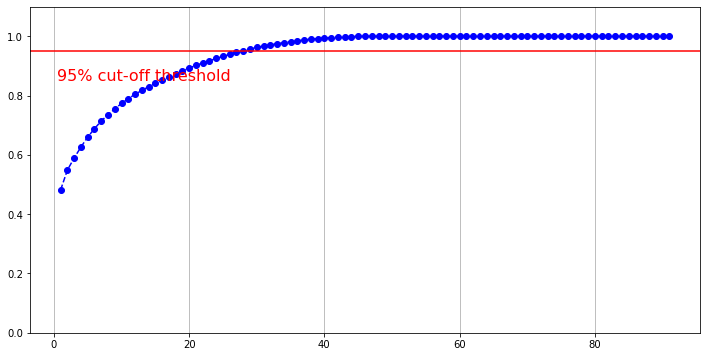

In [51]:
pca = PCA().fit(x_pca)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 92, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize = 16)

ax.grid(axis='x')
plt.show()

In [52]:
pca = PCA(n_components = 28)
pca.fit(x_train)

PCA(n_components=28)

In [53]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [54]:
logreg2 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.4, n_jobs = 2)
logreg2.fit(x_train_pca,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(l1_ratio=0.4, multi_class='multinomial', n_jobs=2,
                   penalty='elasticnet', solver='saga')

In [55]:
y_pred = logreg2.predict(x_test_pca)


acc2 = accuracy_score(y_test,y_pred)

print(acc2)

0.22876165113182423


In [56]:

logreg3 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.9, n_jobs = 2)
logreg3.fit(x_train_pca,y_train)

y_pred = logreg3.predict(x_test_pca)


acc3 = accuracy_score(y_test,y_pred)

print(acc3)

0.22836218375499334


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Only phone_gyro data

In [66]:
phone_gyro_df.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,0,0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,...,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,49
1,0,0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,...,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,49
2,0,0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,...,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,49
3,0,0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,...,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,49
4,0,0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,...,0.174482,0.172240,0.217282,0.518276,0.025885,0.217259,0.519174,0.026706,1.43085,49


In [67]:
phone_gyro_old_column_names = phone_gyro_df.columns

In [68]:
phone_gyro_new_column_names = []
for name in phone_gyro_old_column_names:
    phone_gyro_new_column_names.append(name.replace('"', ''))

In [69]:
phone_gyro_new_column_names

['ACTIVITY',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'Y0',
 'Y1',
 'Y2',
 'Y3',
 'Y4',
 'Y5',
 'Y6',
 'Y7',
 'Y8',
 'Y9',
 'Z0',
 'Z1',
 'Z2',
 'Z3',
 'Z4',
 'Z5',
 'Z6',
 'Z7',
 'Z8',
 'Z9',
 'XAVG',
 'YAVG',
 'ZAVG',
 'XPEAK',
 'YPEAK',
 'ZPEAK',
 'XABSOLDEV',
 'YABSOLDEV',
 'ZABSOLDEV',
 'XSTANDDEV',
 'YSTANDDEV',
 'ZSTANDDEV',
 'XVAR',
 'YVAR',
 'ZVAR',
 'XMFCC0',
 'XMFCC1',
 'XMFCC2',
 'XMFCC3',
 'XMFCC4',
 'XMFCC5',
 'XMFCC6',
 'XMFCC7',
 'XMFCC8',
 'XMFCC9',
 'XMFCC10',
 'XMFCC11',
 'XMFCC12',
 'YMFCC0',
 'YMFCC1',
 'YMFCC2',
 'YMFCC3',
 'YMFCC4',
 'YMFCC5',
 'YMFCC6',
 'YMFCC7',
 'YMFCC8',
 'YMFCC9',
 'YMFCC10',
 'YMFCC11',
 'YMFCC12',
 'ZMFCC0',
 'ZMFCC1',
 'ZMFCC2',
 'ZMFCC3',
 'ZMFCC4',
 'ZMFCC5',
 'ZMFCC6',
 'ZMFCC7',
 'ZMFCC8',
 'ZMFCC9',
 'ZMFCC10',
 'ZMFCC11',
 'ZMFCC12',
 'XYCOS',
 'XZCOS',
 'YZCOS',
 'XYCOR',
 'XZCOR',
 'YZCOR',
 'RESULTANT',
 'class']

In [70]:
replacement_dict = dict(zip(phone_gyro_old_column_names, phone_gyro_new_column_names))
phone_gyro_df = phone_gyro_df.rename(columns = replacement_dict)
phone_gyro_df.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,0,0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,...,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,49
1,0,0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,...,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,49
2,0,0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,...,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,49
3,0,0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,...,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,49
4,0,0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,...,0.174482,0.172240,0.217282,0.518276,0.025885,0.217259,0.519174,0.026706,1.43085,49


In [71]:
phone_gyro_df['ACTIVITY'] = labelencoder.fit_transform(phone_gyro_df['ACTIVITY'])
phone_gyro_df.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,0,0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,...,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,49
1,0,0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,...,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,49
2,0,0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,...,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,49
3,0,0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,...,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,49
4,0,0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,...,0.174482,0.172240,0.217282,0.518276,0.025885,0.217259,0.519174,0.026706,1.43085,49


In [72]:
phone_gyro_df['class'] = labelencoder.fit_transform(phone_gyro_df['class'])
phone_gyro_df.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,0,0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,...,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,49
1,0,0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,...,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,49
2,0,0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,...,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,49
3,0,0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,...,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,49
4,0,0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,...,0.174482,0.172240,0.217282,0.518276,0.025885,0.217259,0.519174,0.026706,1.43085,49


In [73]:
phone_gyro_df['class'].unique()

array([49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33,
       32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
      dtype=int64)

In [74]:
phone_gyro_df['ACTIVITY'].value_counts()

3     984
16    978
10    976
7     974
14    972
12    971
17    970
4     969
1     966
9     959
6     954
11    949
15    948
8     947
2     946
13    944
5     938
0     936
Name: ACTIVITY, dtype: int64

In [75]:
phone_gyro_df['class'].value_counts()

48    406
18    405
5     405
46    405
1     405
13    405
20    405
3     405
47    401
45    401
44    401
49    401
7     383
40    379
42    379
43    379
41    357
25    347
39    324
38    324
36    323
37    323
34    322
21    321
2     321
19    321
35    321
4     321
33    321
32    321
16    321
23    321
6     321
11    321
30    321
14    321
29    321
28    321
12    321
22    321
27    321
26    321
10    321
24    321
8     321
31    321
0     321
9     304
17    303
15    285
Name: class, dtype: int64

In [76]:
phone_gyro_df.groupby(["ACTIVITY","class"])['ACTIVITY'].count()

ACTIVITY  class
0         0        17
          1        22
          2        17
          3        22
          4        17
                   ..
17        45       22
          46       22
          47       22
          48       23
          49       22
Name: ACTIVITY, Length: 890, dtype: int64

In [18]:
#phone_gyro_df.pop('class')
#phone_gyro_df.info()

In [77]:
phone_gyro_df_shuffle = shuffle(phone_gyro_df)

In [78]:
phone_gyro_df_shuffle.head(10)

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
313,13,0.000,0.555,0.445,0.000,0.00,0.0,0.0,0.0,0.0,...,0.016912,0.016695,-0.300460,0.171839,0.066663,-0.300370,0.168181,0.068406,0.561112,46
208,9,0.000,0.970,0.030,0.000,0.00,0.0,0.0,0.0,0.0,...,-0.598148,-0.590461,0.270962,0.841988,-0.072933,-0.565803,0.595759,-0.848562,0.019056,1
304,14,0.000,0.500,0.500,0.000,0.00,0.0,0.0,0.0,0.0,...,0.025569,0.025240,-0.402234,0.555304,-0.052161,-0.401965,0.556946,-0.047949,0.402931,43
59,2,0.145,0.320,0.370,0.135,0.03,0.0,0.0,0.0,0.0,...,0.276901,0.273343,-0.085548,-0.517667,0.105096,-0.085787,-0.525353,0.105330,2.711560,40
65,2,0.000,0.600,0.400,0.000,0.00,0.0,0.0,0.0,0.0,...,0.180898,0.178573,-0.439552,-0.519429,-0.273357,-0.439840,-0.549767,-0.221947,1.286250,25
233,13,0.000,0.515,0.485,0.000,0.00,0.0,0.0,0.0,0.0,...,0.091702,0.090524,-0.271222,-0.280330,0.662909,-0.271570,-0.280519,0.662740,0.707905,26
121,5,0.000,0.475,0.525,0.000,0.00,0.0,0.0,0.0,0.0,...,-0.185368,-0.182986,0.194136,-0.464338,-0.806394,0.196048,-0.466453,-0.805578,0.098668,45
88,3,0.000,0.260,0.740,0.000,0.00,0.0,0.0,0.0,0.0,...,-0.498643,-0.492236,-0.939013,-0.884677,0.865423,-0.938136,-0.896382,0.866970,0.021220,25
279,15,0.000,0.345,0.655,0.000,0.00,0.0,0.0,0.0,0.0,...,-0.307979,-0.304022,-0.538338,0.543805,-0.596141,-0.543098,0.540368,-0.594735,0.050048,26
140,7,0.000,0.460,0.540,0.000,0.00,0.0,0.0,0.0,0.0,...,-0.526324,-0.519561,0.660269,-0.296424,0.399093,0.659999,-0.299981,0.398431,0.013355,11


In [79]:
np_data_phone_gyro = phone_gyro_df_shuffle.to_numpy()
X = np_data_phone_gyro[:,1:]
Y = np_data_phone_gyro[:,0]
print(X.shape)
print(Y.shape)

(17281, 92)
(17281,)


In [83]:
x_sparse = scipy.sparse.csr_matrix(X)

In [84]:
x_sparse

<17281x92 sparse matrix of type '<class 'numpy.float64'>'
	with 1198262 stored elements in Compressed Sparse Row format>

In [85]:


scaler = StandardScaler(with_mean = False).fit(x_sparse)
x_sparse_scaled = scaler.transform(x_sparse)
x_sparse_scaled

<17281x92 sparse matrix of type '<class 'numpy.float64'>'
	with 1198262 stored elements in Compressed Sparse Row format>

In [86]:

x_train_sparse,x_test_sparse,y_train,y_test = train_test_split(x_sparse_scaled,Y,test_size=0.2)

In [80]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [44]:


logreg4 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.3, max_iter = 200, n_jobs = 6)
logreg4.fit(x_train_sparse,y_train)

y_pred = logreg4.predict(x_test_sparse)


y_train_pred = logreg4.predict(x_train_sparse)
train_acc = accuracy_score(y_train, y_train_pred)
acc4 = accuracy_score(y_test,y_pred)

print(train_acc)
print(acc4)

0.3101128472222222
0.3144344807636679


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [48]:

x_pca = StandardScaler().fit_transform(X) # normalizing the features

pca = PCA().fit(x_sparse_scaled)


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 93, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize = 16)

ax.grid(axis='x')
plt.show()

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [96]:
pca = PCA(n_components = 40)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [98]:
logreg5 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.5, n_jobs = 2)
logreg5.fit(x_train_pca,y_train)

y_pred = logreg5.predict(x_test_pca)


acc5 = accuracy_score(y_test,y_pred)

print(acc5)

0.19814868382991033


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [88]:


clf = RandomForestClassifier(random_state=0, n_jobs = 2)
clf.fit(x_train_sparse, y_train)

y_pred = clf.predict(x_test_sparse)

y_pred_train = clf.predict(x_train_sparse)

train_acc = accuracy_score(y_train, y_pred_train)

acc = accuracy_score(y_test, y_pred)

print(train_acc)
print(acc)

1.0
0.5597338733005496


### hyper opt

In [27]:
#pip install hyperopt

In [49]:
space = {
    "n_estimators": hp.quniform("n_estimators", 100, 600, 50),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "min_samples_split": hp.quniform("min_samples_split", 2, 10, 1),
    "max_features": hp.choice("max_features", ["auto","sqrt","log2"]),
}

In [51]:
def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, x_train, y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [57]:
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

  2%|█▎                                                                | 2/100 [00:00<00:06, 15.94trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

  6%|███▉                                                              | 6/100 [00:00<00:05, 16.67trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 10%|██████▌                                                          | 10/100 [00:00<00:05, 17.55trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 12%|███████▊                                                         | 12/100 [00:00<00:05, 15.35trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 16%|██████████▍                                                      | 16/100 [00:00<00:05, 16.38trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 18%|███████████▋                                                     | 18/100 [00:01<00:04, 16.51trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 22%|██████████████▎                                                  | 22/100 [00:01<00:04, 16.84trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 26%|████████████████▉                                                | 26/100 [00:01<00:04, 17.39trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 30%|███████████████████▌                                             | 30/100 [00:01<00:04, 17.29trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 32%|████████████████████▊                                            | 32/100 [00:01<00:03, 17.28trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 36%|███████████████████████▍                                         | 36/100 [00:02<00:03, 17.57trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 40%|██████████████████████████                                       | 40/100 [00:02<00:03, 16.06trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 42%|███████████████████████████▎                                     | 42/100 [00:02<00:03, 15.44trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 46%|█████████████████████████████▉                                   | 46/100 [00:02<00:03, 15.98trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 48%|███████████████████████████████▏                                 | 48/100 [00:02<00:03, 16.32trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 52%|█████████████████████████████████▊                               | 52/100 [00:03<00:02, 17.21trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 56%|████████████████████████████████████▍                            | 56/100 [00:03<00:02, 17.77trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 58%|█████████████████████████████████████▋                           | 58/100 [00:03<00:02, 16.31trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 62%|████████████████████████████████████████▎                        | 62/100 [00:03<00:02, 16.13trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 66%|██████████████████████████████████████████▉                      | 66/100 [00:03<00:02, 16.91trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 68%|████████████████████████████████████████████▏                    | 68/100 [00:04<00:02, 15.81trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 72%|██████████████████████████████████████████████▊                  | 72/100 [00:04<00:01, 15.01trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 74%|████████████████████████████████████████████████                 | 74/100 [00:04<00:01, 14.26trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 76%|█████████████████████████████████████████████████▍               | 76/100 [00:04<00:01, 14.07trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 80%|████████████████████████████████████████████████████             | 80/100 [00:04<00:01, 13.35trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 82%|█████████████████████████████████████████████████████▎           | 82/100 [00:05<00:01, 12.93trial/s, best loss=?]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr


 84%|██████████████████████████████████████████████████████▌          | 84/100 [00:05<00:01, 13.22trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 88%|█████████████████████████████████████████████████████████▏       | 88/100 [00:05<00:00, 13.68trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 90%|██████████████████████████████████████████████████████████▌      | 90/100 [00:05<00:00, 13.65trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

 94%|█████████████████████████████████████████████████████████████    | 94/100 [00:06<00:00, 13.89trial/s, best loss=?]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra


 96%|██████████████████████████████████████████████████████████████▍  | 96/100 [00:06<00:00, 14.19trial/s, best loss=?]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tr

100%|████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.58trial/s, best loss=?]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 130, in _validate_estimator
    raise ValueError("n_estimators must be an integer, "
ValueError: n_estimators must be an integer, got <class 'float'>.

  warnings.warn("Estimator fit failed. The score on this train-test"

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

AllTrialsFailed: 